# Anlyse and plot immune populations in mouse experiment

Script related to figure 6d, s6g

### Aim:
- Analyse immune population in mouse experiments between control and cisplatin treated mice

In [5]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [1]:
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statsmodels.stats.multitest import multipletests

In [2]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get mouse tumour phenotype data

In [4]:
file_name = home + 'Data/6/ID8_TIL_heterogeneity_cisplatin_wash_4-8-19.txt'

mouse_wash = pd.read_csv(
    file_name,
    sep='\t',
    header=0
).dropna(axis="columns", how="all").dropna(axis="rows", how="all")

mouse_wash

,Sample:,NK % of CD45,NK % of live cells,%NK GrB+,CD4 % of CD45,CD4 % of live cells,Treg % of CD4,Tcon % of CD4,CD8 % of CD45,CD8 % of live cells,%CD8 Granzyme B+,CD11b % of CD45,CD11b% of live,CD19 % of CD45,CD19 % of live
0,Peritoneal Wash Cis_Tube_001_062.fcs,6.51,6.34,11.10,6.40,6.23,23.0,74.9,3.77,3.67,1.13,30.7,29.9,31.8,31.0
1,Peritoneal Wash Cis_Tube_002_063.fcs,4.56,4.33,10.10,4.78,4.54,18.9,79.0,2.41,2.28,0.95,48.6,46.1,14.6,13.8
2,Peritoneal Wash Cis_Tube_003_064.fcs,5.83,5.54,9.74,9.52,9.05,16.7,81.6,4.70,4.47,0.97,24.2,23.0,31.9,30.3
3,Peritoneal Wash Cis_Tube_004_065.fcs,5.77,5.46,9.69,7.72,7.30,15.5,82.8,4.15,3.92,1.08,24.4,23.0,38.3,36.2
4,Peritoneal Wash Cis_Tube_005_066.fcs,7.53,7.28,7.87,6.88,6.65,14.1,83.1,5.00,4.83,0.55,29.1,28.1,27.2,26.3
5,Peritoneal Wash PBS_Tube_001_052.fcs,3.24,3.04,10.30,5.38,5.06,21.6,76.4,2.45,2.30,0.74,32.2,30.3,25.0,23.5
6,Peritoneal Wash PBS_Tube_002_053.fcs,3.73,3.58,8.29,6.74,6.46,20.3,77.9,3.00,2.87,1.15,31.8,30.5,25.6,24.6
7,Peritoneal Wash PBS_Tube_003_054.fcs,3.57,3.51,11.30,5.38,5.29,16.4,81.7,3.08,3.03,1.07,49.5,48.7,16.9,16.6
8,Peritoneal Wash PBS_Tube_004_055.fcs,2.98,2.83,9.38,7.88,7.50,17.9,80.3,3.93,3.74,1.51,32.4,30.8,28.1,26.7
9,Peritoneal Wash PBS_Tube_005_056.fcs,3.63,3.47,11.40,8.66,8.29,15.6,83.0,3.71,3.55,1.64,19.0,18.2,36.7,35.1


In [5]:
treatment = []
for name in mouse_wash["Sample:"]:
    
    if "PBS" in name:
    
        treatment.append("PBS")
    
    elif "Cis" in name:
        
        treatment.append("Cis")
        
    else:
        raise ValueError()

pd.Series(treatment)

0    Cis
1    Cis
2    Cis
3    Cis
4    Cis
5    PBS
6    PBS
7    PBS
8    PBS
9    PBS
dtype: object

In [6]:
mouse_wash["Treatment"] = pd.Series(treatment)

mouse_wash["Treatment"]

0    Cis
1    Cis
2    Cis
3    Cis
4    Cis
5    PBS
6    PBS
7    PBS
8    PBS
9    PBS
Name: Treatment, dtype: object

In [7]:
mouse_wash = mouse_wash.iloc[::-1]

mouse_wash["Treatment"]

9    PBS
8    PBS
7    PBS
6    PBS
5    PBS
4    Cis
3    Cis
2    Cis
1    Cis
0    Cis
Name: Treatment, dtype: object

In [8]:
for variable in mouse_wash.columns.values:
    
    if variable not in set(["Sample:", "Treatment"]):
        
        print(variable)
        
        n1 = scipy.stats.shapiro(mouse_wash[mouse_wash["Treatment"]=="PBS"][variable])[1]
        n2 = scipy.stats.shapiro(mouse_wash[mouse_wash["Treatment"]=="Cis"][variable])[1]
        
        #n3 = scipy.stats.normaltest(mouse_tumour[mouse_tumour["Treatment"]=="PBS"][variable])[1]
        #n4 = scipy.stats.normaltest(mouse_tumour[mouse_tumour["Treatment"]=="Cis"][variable])[1]
        
        if min(n1,n2) < 0.05:
            
            print("Not normal")
        
            eq_var = scipy.stats.levene(
                mouse_wash[mouse_wash["Treatment"]=="PBS"][variable],
                mouse_wash[mouse_wash["Treatment"]=="Cis"][variable],
            )[1]
            
        else:
            
            print("Normal")
            
            eq_var = scipy.stats.bartlett(
                mouse_wash[mouse_wash["Treatment"]=="PBS"][variable],
                mouse_wash[mouse_wash["Treatment"]=="Cis"][variable],
            )[1]
         
        if eq_var > 0.05:
            
            print("equal_var=True")
            
            diff_pval = scipy.stats.ttest_ind(
                a=mouse_wash[mouse_wash["Treatment"]=="PBS"][variable],
                b=mouse_wash[mouse_wash["Treatment"]=="Cis"][variable],
                equal_var=True
            )[1]
            
            print(diff_pval)
            print("")
            
        else:
            
            print("equal_var=False")
            
            diff_pval = scipy.stats.ttest_ind(
                a=mouse_wash[mouse_wash["Treatment"]=="PBS"][variable],
                b=mouse_wash[mouse_wash["Treatment"]=="Cis"][variable],
                equal_var=False
            )[1]
            
            print(diff_pval)
            print("")

NK % of CD45
Normal
equal_var=False
0.004446522869721099

NK % of live cells
Normal
equal_var=False
0.005301962746967894

%NK GrB+
Normal
equal_var=True
0.5969888416949242

CD4 % of CD45
Normal
equal_var=True
0.8111188301845462

CD4 % of live cells
Normal
equal_var=True
0.8138860551348326

Treg % of CD4
Normal
equal_var=True
0.7183406541815198

Tcon % of CD4
Normal
equal_var=True
0.8346754538920589

CD8 % of CD45
Normal
equal_var=True
0.1791059674393675

CD8 % of live cells
Normal
equal_var=True
0.18520811386958258

%CD8 Granzyme B+
Normal
equal_var=True
0.17198353088922055

CD11b % of CD45
Normal
equal_var=True
0.817019559401616

CD11b% of live
Normal
equal_var=True
0.8015758944553797

CD19 % of CD45
Normal
equal_var=True
0.6623674291420647

CD19 % of live
Normal
equal_var=True
0.6565674197812347



## Plot

In [9]:
VARS1 = ["CD8 % of live cells", # 0.18520811386958258
        "NK % of live cells", # 0.001223485588836161 --Significant
        "CD8 % of CD45", # 0.1791059674393675
        "NK % of CD45", # 0.0008741910091085169 --Significant
        "%CD8 Granzyme B+", # 0.17198353088922055
        "%NK GrB+"] # 0.5969888416949242

In [10]:
VARS2 = ["CD4 % of live cells", # 0.8138860551348326
        "CD11b% of live", # 0.8015758944553797
        "CD19 % of live", # 0.6565674197812347
        "CD4 % of CD45", # 0.8111188301845462
        "CD11b % of CD45", # 0.8015758944553797
        "CD19 % of CD45", # 0.6623674291420647
        "Tcon % of CD4", # 0.8346754538920589
        "Treg % of CD4" # 0.7183406541815198
       ] 

In [23]:
def violintplots(var, data):
    
    variable = var
    
    fig, ax = plt.subplots()
    fig.set_size_inches(3,3)

    sns.violinplot(x="Treatment",
                   y=variable,
                   data=data,
                   inner=None,
                   hue="Treatment",
                   split=True,
                   scale="count",
                   scale_hue=False,
                   zorder=0,
                   width=0.7
                   )

    sns.stripplot(x='Treatment',
                  y=variable,
                  data=data,
                  hue="Treatment",
                  jitter=0, zorder=2)

    ax.get_legend().remove()

    """if "% of live" in variable:
        plt.ylim([0,10])
    elif "CD45" in variable:
        plt.ylim([0,10])
    elif "of CD4" in variable:
        plt.ylim([0,90])    
    elif "GrB" in variable:
        plt.ylim([0,14])"""
    
    return fig

### Fig 6d

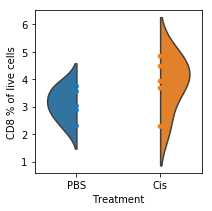

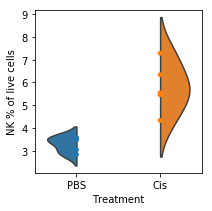

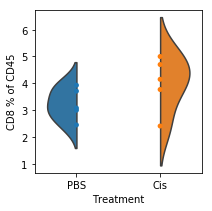

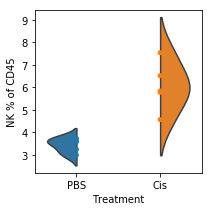

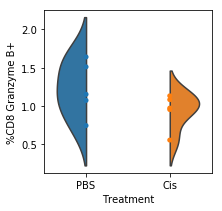

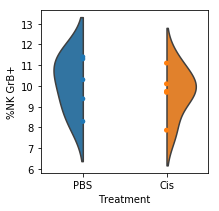

In [24]:
for var in VARS1:
    
    fig = violintplots(var, mouse_wash)
    
    var_cell = var.replace(" ", "")
    
    file_name = "../../Figures/main/6/panels/6d_NACT_mouse_tumor_%s_comparison_ID8.pdf" % var_cell
    
    fig.savefig(file_name)

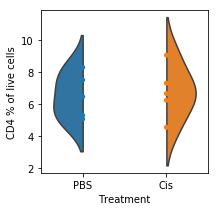

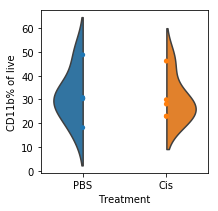

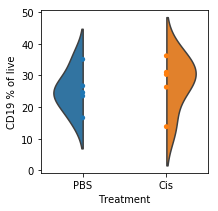

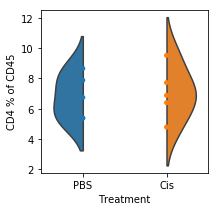

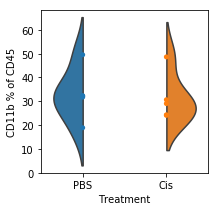

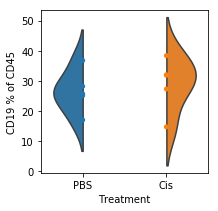

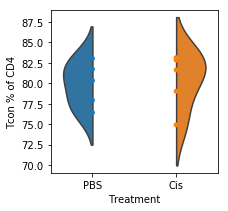

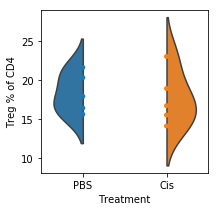

In [25]:
for var in VARS2:
    
    fig = violintplots(var, mouse_wash)
    
    var_cell = var.replace(" ", "")
    
    file_name = "../../Figures/main/6/panels/6d_NACT_mouse_tumor_%s_comparison_ID8.pdf" % var_cell
    
    fig.savefig(file_name)

# End script